In [1]:
# irisデータのロード
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X = iris.data
y = iris.target # クラスラベルは今回は未知とする

In [2]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.fit_transform(X)

In [3]:
# 主成分分析の実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_std)

In [4]:
# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いての実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_pca[:, 0:2])

In [5]:
# クラスタリングの結果を出力
import matplotlib.pyplot as plt
% matplotlib inline

# クラスタリングの結果をプロットする関数
# (クラスタの数, 学習器, 学習データ)
def kmeans_plot(n_clusters, km, X):
    # クラスタの予測値を算出
    y_km = km.fit_predict(X)
    
    # クラスタごとに散布図をプロット
    # 5クラスまでプロットできる
    for i, color, marker in zip(range(n_clusters), 'rgbcm', '>o+xv'):
        plt.scatter(X[y_km==i, 0],            # 横軸の値
                    X[y_km==i, 1],            # 縦軸の値
                    color=color,              # プロットの色
                    marker=marker,            # プロットの形
                    label='cluster ' + str(i) # ラベル
                   )
    
    # クラスタの中心をプロット
    plt.scatter(km.cluster_centers_[:, 0],    # 横軸の値
                km.cluster_centers_[:, 1],    # 縦軸の値
                color='y',                    # プロットの色
                marker='*',                   # プロットの形
                label='centroids',            # ラベル
                s=300,                        # プロットのサイズを大きくして見やすくする
               )
    
    plt.legend()
    plt.grid()
    plt.show()

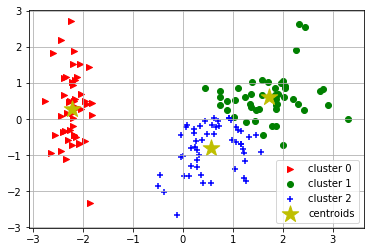

In [6]:
# プロットを実行
kmeans_plot(3, km, X_pca[:, 0:2])

In [7]:
# y_kmを確認
y_km

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [8]:
# 正解ラベルを作る
# プロットを見ると､このときはversicolorとversinicaのlabelが逆になっている
# 両者のラベルを入れ替えて､正解ラベルをつくる
y_correct = np.hstack((y[0:50], y[100:150]))
y_correct = np.hstack((y_correct, y[50:100]))
y_correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
# 正答数を累積
correct_ans = 0
for i in range(len(y_correct)):
    if y_km[i] == y_correct[i]:
        correct_ans += 1

# 正答率を出力
correct_ans / len(y)

0.8333333333333334

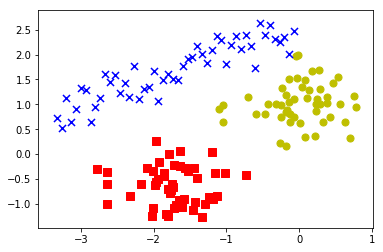

In [10]:
# 超級上でないクラスタを作成

# サンプル数50の超球状のクラスタを生成
from sklearn.datasets import make_blobs
X_1, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=1,
                 cluster_std=0.4,
                 center_box=[0, -2],
                 random_state=6
                )

# サンプル数50の超球状のクラスタを生成
X_2, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=1,
                 cluster_std=0.4,
                 center_box=[0, 2],
                 random_state=9
                )

# サンプル数50の細長いクラスタを生成
from numpy.random import *
seed(2)
X_31 = np.array([i/15 for i in range(-50, 0)])
X_32 = np.array([0.5*float(i) + 2 + float(randint(100))/100 for i in X_31])
X_3 = np.hstack((X_31.reshape(-1, 1), X_32.reshape(-1, 1)))

# 2種類のクラスタを色分けして表示
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', marker='s', s=50)
plt.scatter(X_2[:, 0], X_2[:, 1], c='y', marker='o', s=50)
plt.scatter(X_3[:, 0], X_3[:, 1], c='b', marker='x', s=50)
plt.show()

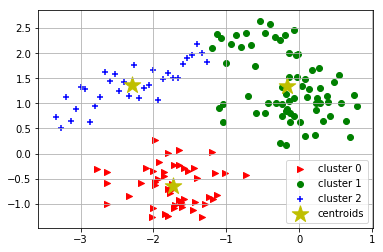

In [11]:
# 生成したクラスタのデータを統合
X = np.vstack((X_1, X_2))
X = np.vstack((X, X_3))

# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X)

# プロットを実行
# 大きなクラスタのところに､小さなクラスタが食い込んでしまっているのがわかる
kmeans_plot(3, km, X)

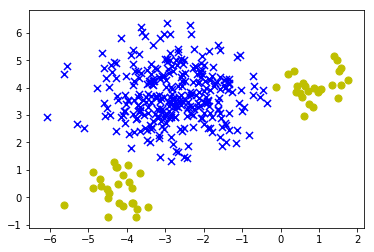

In [12]:
# サンプル数が大きく異なるクラスタを生成
from sklearn.datasets import make_blobs

# サンプル数25のクラスタを2つ生成
X_1, _ = make_blobs(n_samples=50,
                 n_features=2,
                 centers=2,
                 cluster_std=0.5,
                 random_state=3
                )

# サンプル数300のクラスタを1つ生成
X_2, _ = make_blobs(n_samples=300,
                 n_features=2,
                 centers=1,
                 cluster_std=1.0,
                 center_box=(-5, 5),
                 random_state=5
                )

# 2種類のクラスタを色分けして表示
plt.scatter(X_1[:, 0], X_1[:, 1], c='y', marker='o', s=50)
plt.scatter(X_2[:, 0], X_2[:, 1], c='b', marker='x', s=50)
plt.show()

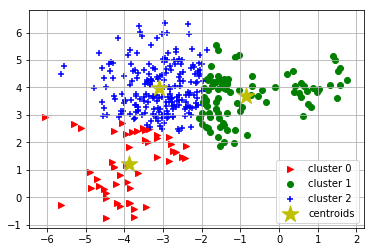

In [13]:
# 生成したクラスタのデータを統合
X_blobs = np.vstack((X_1, X_2))

# k-means法を実行
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,   # クラスタの個数を指定
            init='random',  # セントロイドの初期値の決め方を決定
            n_init=10,      # 異なるセントロイドの初期値を用いた実行回数
            max_iter=300,   # ひとつのセントロイドを用いたときの最大イテレーション回数
            tol=1e-04,      # 収束と判定するための相対的な許容誤差
            random_state=0, # セントロイドの初期化に用いる乱数生成器の状態
           )

# クラスラベルを予測
y_km = km.fit_predict(X_blobs)

# プロットを実行
kmeans_plot(3, km, X_blobs)

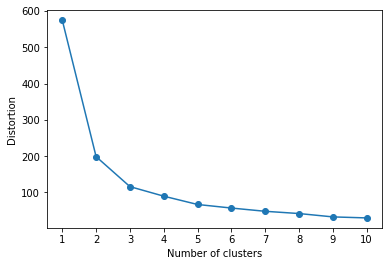

In [14]:
# エルボー法による､適切なkの値の確認

# 各kで算出されたSSEを格納するリストを定義
distortions = []

# kを変えながらk-means法を実行
for k  in range(1,11):              # 1~10クラスタまで繰り返し計算 
    km = KMeans(n_clusters=k,       # クラスタの数をk個に指定
                init='random',   # セントロイドの初期値をk-means++法で設定
                n_init=10,          # セントロイドの初期値を変えての繰り返し回数を指定
                max_iter=300,       # 一回の最適化の繰り返し回数を指定
                random_state=0)     # 乱数の生成状態を指定
    
    km.fit(X_pca[:, 0:2])                       # クラスタリングの計算を実行
    distortions.append(km.inertia_) # SSEをリストに格納していく

# 結果を散布図に出力
plt.plot(range(1,11), distortions,marker='o') # 1から10までのSSEを順にプロット
plt.xticks([i for i in range(1, 11)])         # 横軸のメモリを1から10までの1刻みに設定
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()